In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.decomposition import TruncatedSVD, PCA, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from gensim import corpora
from gensim.models import LsiModel

data = fetch_20newsgroups(shuffle=True, random_state=32, remove=('headers', 'footers', 'quotes'))
docs = data.data
dataframe = pd.DataFrame({'document':docs})
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
text = []
for i in dataframe['document']:
    raw = str(i).lower()
    # Tokenizing
    tokens = tokenizer.tokenize(raw)
    # Removing stopwords
    stopped_tokens = [j for j in tokens if not j in en_stop]
    # Lemmatizing tokens
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in stopped_tokens]
    # Remove tokens consisting of one single char
    tokens_without_single = [j for j in lemma_tokens if not len(j) == 1]
    # Remove numeric tokens
    tokens_without_num = [j for j in tokens_without_single if not j.isnumeric()]
    text.append(tokens_without_num)
detokenized_text = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_text.append(t)
dataframe['clean_doc'] = detokenized_text

# Tfidf the preprocessed data
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
X = vectorizer.fit_transform(dataframe['clean_doc'])

# Apply LDA algorithm
lda_model = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda_model.fit_transform(X)
#print_top_words(lda_model, terms, 10)
terms = vectorizer.get_feature_names()
outputstr = ""
for index, topic in enumerate(lda_model.components_):
    outputstr = "Topic %d: " %index
    outputstr += " ".join([terms[j] for j in topic.argsort()[-10:]])
    print(outputstr)
    outputstr = ""
print()


Topic 0: thing christian time like right know say think god people
Topic 1: think win hockey fan season play player year team game
Topic 2: help driver using use problem know program thanks file window
Topic 3: bit machine possible set available current software shuttle anonymous service
Topic 4: drive south guy mail day old news space sci address
Topic 5: face normal school wanted article patient blood soon bank edu
Topic 6: use escrow security government phone nsa clipper encryption chip key
Topic 7: student ground think ca steve sure oh yes dod bike
Topic 8: civilian water medical killed disease attack jewish arab israeli israel
Topic 9: modem shipping controller mac offer disk scsi sale card drive
Topic 10: place america minute mode old hand using problem team mouse
Topic 11: net like going know matter shot gun round foot auto
Topic 12: application family kid police unless design consider use value tax
Topic 13: gm soviet russian genocide armenia turk turkey greek turkish armenian


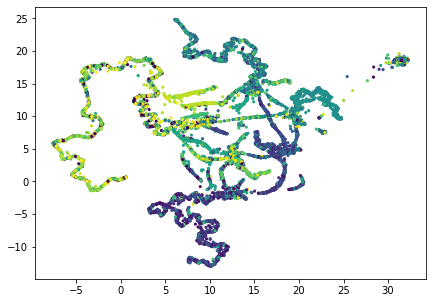

In [13]:
import umap
X_topics = lda_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = data.target, s = 10, edgecolor='none')
plt.show()